In [1]:
%pylab
%matplotlib inline
set_printoptions(precision=1)
from scipy.signal import convolve2d

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
x = array([0,0,0,0,1,1,1,1,0,0,0,0])
x

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [3]:
def array_as_string(x,width=5,precision=1):
    return '['+(' '.join([("{0:"+str(width)+"."+str(precision)+"f}").format(e) for e in x]))+']'

def print_array(name,x,width=2,precision=None):
    if precision is None:
        precision = 0 if x.dtype == int64 else 1
    print(name,array_as_string(x,width,precision))

def plot_1dconv(x,y):
    figure(figsize=(5,2))
    ylim(min(0,min(x),min(y)),4);xlim(0,len(x))
    plot(range(len(x)),x,'ro',range(len(x)),y,'x',markersize=10)
    legend(('x','conv(x)'))

## Convolution avec noyau (1,1,1):
$$y_i = x_{i-1} + x_{i} + x_{i+1}$$

('x=', array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]))
('y=', array([0, 0, 0, 1, 2, 3, 3, 2, 1, 0, 0, 0]))


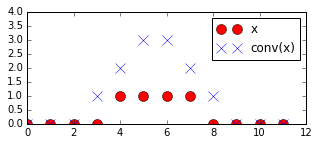

In [4]:
y = convolve(x,(1,1,1),mode='same')
print('x=',x)
print('y=',y)
plot_1dconv(x,y)

('x=', '[0.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0]')
('y=', '[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]')


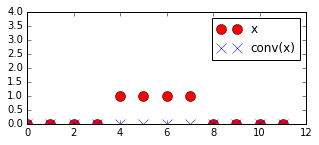

In [5]:
y = convolve(x,(1/3,1/3,1/3),mode='same')
print_array('x=',x,precision=1)
print_array('y=',y,precision=1)
plot_1dconv(x,y)

('x=', '[ 0  0  0  0  1  1  1  1  0  0  0  0]')
('y=', '[ 0  0  0 -1 -1  0  0  1  1  0  0  0]')


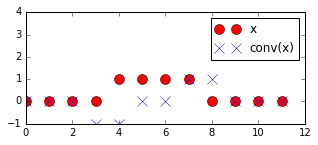

In [6]:
y = convolve(x,(-1,0,1),mode='same')
print_array('x=',x)
print_array('y=',y)
plot_1dconv(x,y)

## 2D Convolution

In [7]:
x = maximum(eye(7),eye(7)[::-1])
print(x)

[[ 1.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  0.  1.]]


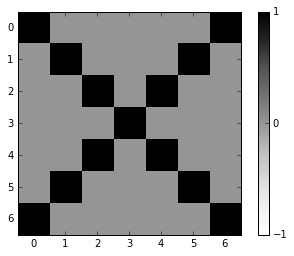

In [8]:
imshow(x,  cmap='Greys',interpolation='nearest',clim=(-1,1))
colorbar(ticks=[-1,0, 1])

[[ 1. -1.  1.]
 [-1.  1. -1.]
 [ 1. -1.  1.]]


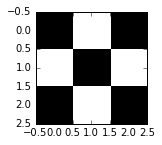

In [9]:
k = maximum(eye(3),eye(3)[::-1])*2-1
print(k)
figure(figsize=(2,2))
imshow(k,cmap='Greys',  interpolation='nearest')


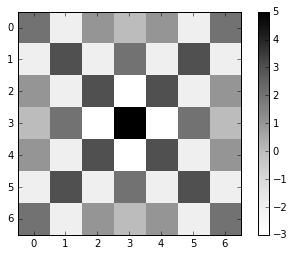

In [10]:
y = convolve2d(x,k,mode='same')
imshow(y,cmap='Greys',  interpolation='nearest')
colorbar()

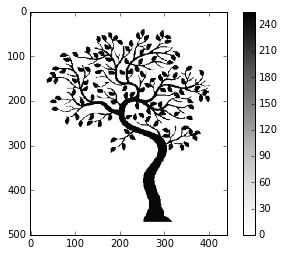

In [11]:
#tree = 255 - imread('images/tree1.jpeg')
#squirrel = imread('images/squirrel.jpeg')
#squirrel = 255 - np.sum(squirrel,axis=2)//3

squirrel = np.load('images/squirrel.npy')
tree     = np.load('images/tree.npy')

imshow(tree,cmap='Greys')
colorbar()

In [12]:
n = 35
m  = ones((n,n))*(-1)
for (i,j),_ in ndenumerate(m):
    n = len(m)
    k = round(n*0.35)
    if (i-n/2)**2 + (j-n/2)**2 < k**2:
        m[i,j] = 1

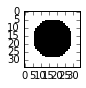

In [13]:
figure(figsize=(1,1))
imshow(m,cmap='Greys',interpolation='nearest')

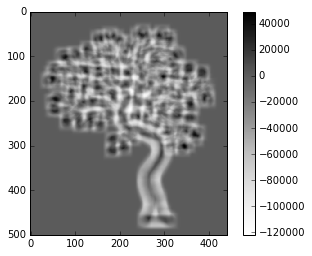

In [14]:
y = convolve2d(tree,m,mode='same')
imshow(y,cmap='Greys',  interpolation='nearest')
colorbar()

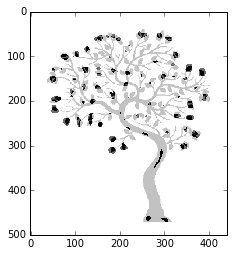

In [15]:
z = (y>5000)*150 + tree/3
imshow(z,cmap='Greys',  interpolation='nearest')

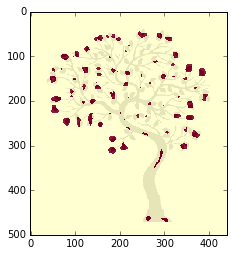

In [16]:
imshow(tree,cmap='Greys',  interpolation='nearest')
imshow(y>5000, cmap='YlOrRd',  alpha=.9, interpolation='nearest')


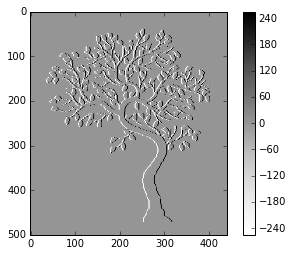

In [17]:
y = convolve2d(tree,array([[-1,0,1]]),mode='same')
imshow(y,cmap='Greys',  interpolation='nearest')
colorbar()

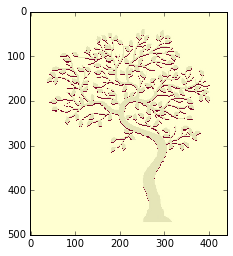

In [18]:
y = convolve2d(tree,array([[-1,0,1]]).T,mode='same')
imshow(tree,cmap='Greys',  interpolation='nearest')
imshow(y>100, cmap='YlOrRd',  alpha=.9, interpolation='nearest')


In [19]:
from scipy.misc import imrotate

(500, 440)


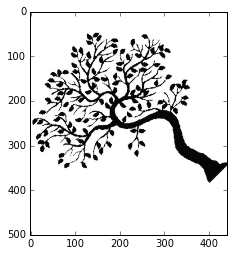

In [20]:
print(imrotate(tree,45).shape)
imshow(imrotate(tree,45),cmap='Greys')

In [21]:
import tensorflow as tf
tf.reset_default_graph()

In [36]:
m = numpy.load('data/kern__181.478.txt.npy')


<tf.Tensor 'Placeholder_1:0' shape=(?, 500, 440) dtype=float32>

In [25]:
images  = tf.placeholder(tf.float32, [None,500,440])
labels  = tf.placeholder(tf.float32,[None],name='labels')
#kernel = tf.Variable(tf.truncated_normal(m.shape),dtype=tf.float32)
kernel = tf.Variable(m,dtype=tf.float32)

In [33]:
sess = tf.InteractiveSession()

def simple_conv2d(im,kernel):
    mean_kernel = tf.reduce_mean(kernel)
    kernel2 = kernel - mean_kernel
    k_reshape  = tf.reshape(kernel2,[*map(int,kernel.get_shape()),1,1])
    im_reshape = tf.reshape(im,[-1,images.get_shape()[1].value,images.get_shape()[2].value,1])
    return tf.nn.conv2d(im_reshape, k_reshape, strides=[1,3,3,1], padding='VALID')


SyntaxError: invalid syntax (<ipython-input-33-323f28891d61>, line 6)

In [28]:
im_out = simple_conv2d(images,kernel)
bias = tf.Variable(181.478)

out = tf.reduce_max(im_out,reduction_indices=[1,2,3]) - bias

#im_out_reshaped = tf.reshape(im_out,[-1,im_out.get_shape()[1].value*im_out.get_shape()[2].value])
#out = tf.reduce_mean(tf.nn.softmax(im_out_reshaped),axis=1) - bias

ValueError: Argument must be a dense tensor: [[35, 35], 1, 1] - got shape [3], but wanted [3, 2].

In [190]:
crossentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=out))

In [191]:
train_step = tf.train.AdamOptimizer(0.001).minimize(crossentropy) # 0.1 works well

In [192]:
tf.global_variables_initializer().run()

In [193]:
from scipy.ndimage.morphology import binary_erosion

def rand_perturbation(im):
    rot = imrotate(im,random.randint(360))
    
    if random.random() > 0.9:
        noiz= rot * ((random.random(im.shape)) > 0.1).astype(float)
        res = binary_erosion(noiz).astype(float)
    else:
        res = (rot * ((random.random(im.shape)) > 0.5).astype(float)).astype(float)
    return res/std(res)

#t = rand_perturbation(tree)
#imshow(t,cmap='Greys')

def regenerate_perturbed_labeled_imagelist(n=5):
    images_list = []
    labels_list = []

    for i in range(n):
        images_list.append( rand_perturbation(tree) )
        labels_list.append( 1.0 )
        images_list.append( rand_perturbation(squirrel) )
        labels_list.append( 0.0 )
    return images_list,labels_list

images_list,labels_list = regenerate_perturbed_labeled_imagelist()

In [ ]:
for i in range(15):
    if i%5==0:
        images_list,labels_list = regenerate_perturbed_labeled_imagelist(n=100)
        _crossentropy = sess.run(crossentropy,feed_dict={
                images:array(images_list),labels:array(labels_list)})
        print('step ',i,'  -> crossentropy=',_crossentropy)
        #_bias = sess.run(bias,feed_dict={images:images_list,labels:labels_list})
        #numpy.save('kern'+str(i)+'___'+str(_bias)+'.txt' , kernel.eval())
    images_list,labels_list = regenerate_perturbed_labeled_imagelist(100) # 10 works well
    sess.run(train_step,feed_dict={images:images_list,labels:labels_list})

step  0   -> crossentropy= 0.283494
step  5   -> crossentropy= 0.167383


In [177]:
numpy.save('kern__'+str(_bias)+'.txt' , kernel.eval())

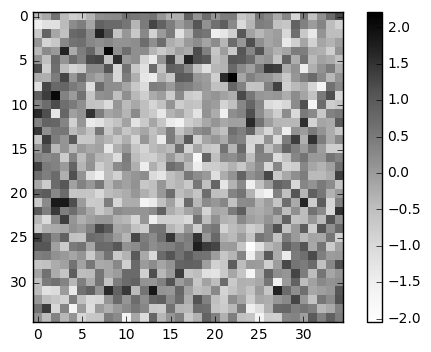

In [178]:
imshow(kernel.eval(),interpolation='nearest',cmap='Greys')
colorbar()

In [179]:
z,zout = sess.run([im_out,out],feed_dict={images:images_list[:2],labels:labels_list[:2]})
zout

array([ 37.6, -30.3], dtype=float32)

In [180]:
images_list,labels_list = regenerate_perturbed_labeled_imagelist(n=100)
zout = sess.run(out,feed_dict={images:images_list,labels:labels_list})

In [181]:
np.mean((zout > 0).astype(int) == labels_list)

0.96499999999999997

83.576035

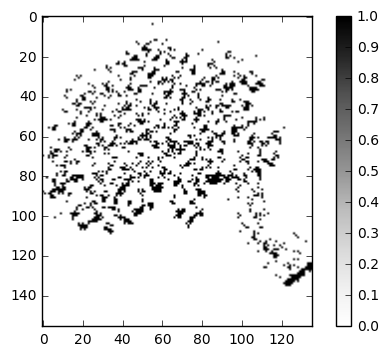

In [152]:
z0 = z[0,:,:,0]
imshow(z0>20,cmap='Greys')
colorbar()
np.max(z0)

79.650146

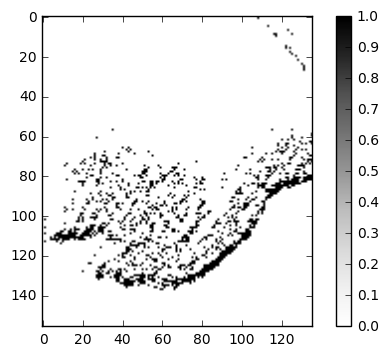

In [153]:
z1 = z[1,:,:,0]
imshow(z1>20,cmap='Greys')
colorbar()
np.max(z1)